In [ ]:
pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset .csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#Cusines total number of votes
data = df.groupby('Cuisines')['Votes'].sum().reset_index()

In [8]:
data[data['Votes']!=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

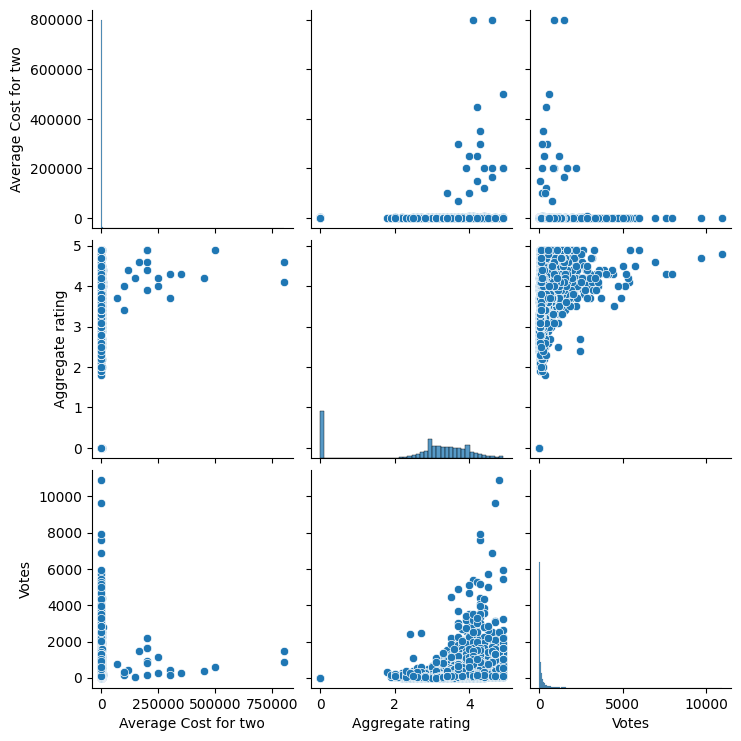

In [10]:
sns.pairplot(df[['Average Cost for two','Aggregate rating','Votes']])

<Axes: ylabel='count'>

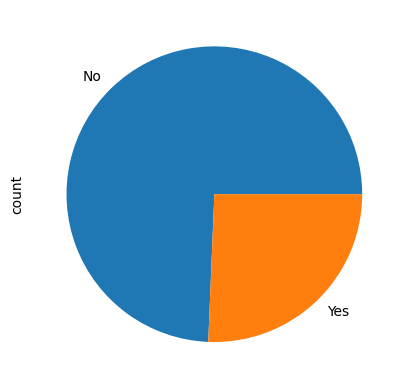

In [11]:
df["Has Online delivery"].value_counts().plot(kind='pie', color=['blue', 'orange'])

In [12]:
df[["Aggregate rating","Rating text"]].tail(10)

,Aggregate rating,Rating text
9541,4.2,Very Good
9542,3.7,Good
9543,4.5,Excellent
9544,4.7,Excellent
9545,4.3,Very Good
9546,4.1,Very Good
9547,4.2,Very Good
9548,3.7,Good
9549,4.0,Very Good
9550,4.0,Very Good


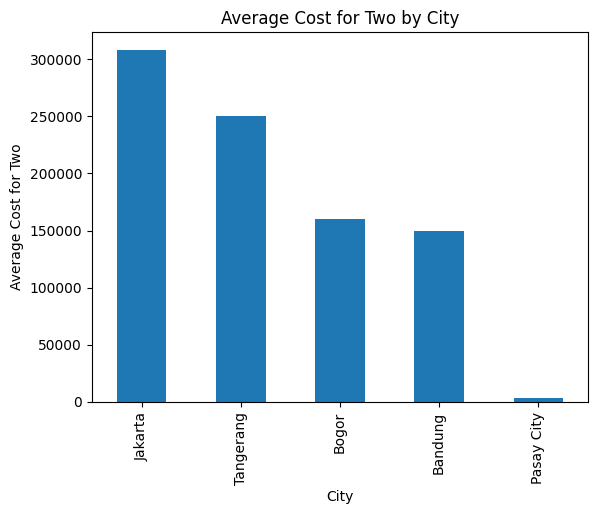

In [16]:
df.groupby('City')["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind='bar') 
plt.title('Average Cost for Two by City')
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.show()

In [18]:
data = df.groupby('Cuisines')["Votes"].sum().sort_values(ascending=False).reset_index()
data

,Cuisines,Votes
0,"North Indian, Mughlai",53747
1,North Indian,46241
2,"North Indian, Chinese",42012
3,Cafe,30657
4,Chinese,21925
...,...,...
1820,"Mithai, North Indian, South Indian, Chinese, S...",0
1821,"Cafe, Tibetan",0
1822,"Chinese, Fast Food, Pizza",0
1823,"Chinese, Italian",0


In [23]:
df[['Aggregate rating','Rating text']].sort_values(by='Aggregate rating', ascending=True).head(200)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
6500,0.0,Not rated
6479,0.0,Not rated
8704,0.0,Not rated
8703,0.0,Not rated


In [24]:
df = df[df["Rating text"] != 'Not rated']

In [25]:
df["Rating text"].value_counts()

Rating text
Average      3737
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [26]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [27]:
X = df[['Average Cost for two', 'Has Table booking','Has Online delivery','Price range']]

In [28]:
y = df[['Aggregate rating']]

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
X["Has Table booking"] = le.fit_transform(X["Has Table booking"])
X["Has Online delivery"] = le.fit_transform(X["Has Online delivery"])

/var/folders/l6/5ccjw8px10j9fzzs0j_tnd840000gn/T/ipykernel_2462/515821772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = le.fit_transform(X["Has Table booking"])
/var/folders/l6/5ccjw8px10j9fzzs0j_tnd840000gn/T/ipykernel_2462/515821772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = le.fit_transform(X["Has Online delivery"])


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [37]:
def modelresults(pred):
    print("Mean Squared Error:", mean_squared_error(y_test, pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, pred))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
predfromlr = model.predict(X_test)
modelresults(predfromlr)

Mean Squared Error: 0.25570607449837746
Mean Absolute Error: 0.40124006807127705


In [41]:
predfromlr

array([[3.22358822],
       [3.42881105],
       [3.16382936],
       ...,
       [3.22330059],
       [3.2240676 ],
       [3.42852342]], shape=(1481, 1))

In [42]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [43]:
svrmodel = SVR()

In [46]:
param_gridsvr = {"C": [0.001,0.5], "kernel": ["linear","poly"],"degree": [2]}

In [ ]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(X_train, y_train)

In [49]:
predsgridsvr = gridsvr.predict(X_test)
modelresults(predsgridsvr)

Mean Squared Error: 0.25976504660740246
Mean Absolute Error: 0.4016415228257578


In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
param_grid = {
    "max_depth": [10, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [52]:
treemodel = DecisionTreeRegressor()
grid_tree = GridSearchCV(treemodel, param_grid)
grid_tree.fit(X_train, y_train) 

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [10, 30], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [53]:
treepreds = grid_tree.predict(X_test)
modelresults(treepreds)

Mean Squared Error: 0.20154055358841905
Mean Absolute Error: 0.35554852567379847


In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfmodel = RandomForestRegressor()

In [56]:
param_gridfr ={
    "n_estimators": [100, 200],
    "max_depth": [10, 30],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [ ]:
gridfr = GridSearchCV(rfmodel, param_gridfr)
gridfr.fit(X_train, y_train)


In [58]:
randomforestpreds = gridfr.predict(X_test)
modelresults(randomforestpreds)
    

Mean Squared Error: 0.1998551774631977
Mean Absolute Error: 0.3532816670181974


In [60]:
gridfr.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn = KNeighborsRegressor()
knn_param_grid = {
    "n_neighbors": [3, 5, 7],
}
knn_grid_search = GridSearchCV(knn, knn_param_grid)
knn_grid_search.fit(X_train, y_train)


,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,7


In [63]:
knnpreds = knn_grid_search.predict(X_test)
modelresults(knnpreds)


Mean Squared Error: 0.2296149871157106
Mean Absolute Error: 0.3788077553776406


In [64]:
knn_grid_search.best_params_

{'n_neighbors': 7}

In [66]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor()
ada_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.5, 1.0]
}
ada_grid_search = GridSearchCV(ada, ada_param_grid)
ada_grid_search.fit(X_train, y_train)


In [68]:
adapreds = ada_grid_search.predict(X_test)
modelresults(adapreds)


Mean Squared Error: 0.21244306660707066
Mean Absolute Error: 0.3679613276125639


In [69]:
import joblib
joblib.dump(gridfr,"mlmodel.pkl")

['mlmodel.pkl']

In [70]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [71]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']